# Formula 1 Lap Time Prediction Project - Date Collection Notebook

## Introduction
In this notebook, I will collect historical lap time data for the 2024 Formula 1 season using the FastF1 library.  
This data will be used for further analysis and model building in subsequent phases of the project.

In [1]:
# Importing libraries
import fastf1
import pandas as pd

# Enabling caching
fastf1.Cache.enable_cache('cache')

## Getting Data

In [33]:
# Getting data from all races in 2023
chosen_year = 2023

season_schedule = fastf1.get_event_schedule(chosen_year, include_testing=False)

all_laps = []

for eventName in season_schedule['EventName']:
    event = fastf1.get_event(chosen_year, eventName)
    race = event.get_race()
    race.load()
    laps = race.laps.copy()
    laps['EventName'] = eventName
    all_laps.append(laps)

laps_df = pd.concat(all_laps, ignore_index=True)
laps_df.head()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Pri

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,EventName
0,0 days 01:04:15.961000,VER,1,0 days 00:01:39.019000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.414000,...,Red Bull Racing,0 days 01:02:36.652000,2023-03-05 15:03:38.501,12,1.0,False,,False,False,Bahrain Grand Prix
1,0 days 01:05:53.935000,VER,1,0 days 00:01:37.974000,2.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.504000,...,Red Bull Racing,0 days 01:04:15.961000,2023-03-05 15:05:17.810,12,1.0,False,,False,True,Bahrain Grand Prix
2,0 days 01:07:31.941000,VER,1,0 days 00:01:38.006000,3.0,1.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.469000,...,Red Bull Racing,0 days 01:05:53.935000,2023-03-05 15:06:55.784,1,1.0,False,,False,True,Bahrain Grand Prix
3,0 days 01:09:09.917000,VER,1,0 days 00:01:37.976000,4.0,1.0,NaT,NaT,0 days 00:00:31.271000,0 days 00:00:42.642000,...,Red Bull Racing,0 days 01:07:31.941000,2023-03-05 15:08:33.790,1,1.0,False,,False,True,Bahrain Grand Prix
4,0 days 01:10:47.952000,VER,1,0 days 00:01:38.035000,5.0,1.0,NaT,NaT,0 days 00:00:31.244000,0 days 00:00:42.724000,...,Red Bull Racing,0 days 01:09:09.917000,2023-03-05 15:10:11.766,1,1.0,False,,False,True,Bahrain Grand Prix


## Cleaning Data

In [120]:
missing_values = laps_df.isnull().sum()
print(missing_values[missing_values > 0])

LapTime                 448
PitOutTime            23501
PitInTime             23488
Sector1Time             544
Sector2Time              50
Sector3Time             116
Sector1SessionTime      591
Sector2SessionTime       50
Sector3SessionTime      116
SpeedI1                3784
SpeedI2                  50
SpeedFL                 995
SpeedST                2159
IsPersonalBest           41
LapStartDate             41
Position                 49
DeletedReason            41
dtype: int64


In [130]:
# Dropping rows with missing lap times
cleaned_laps_df = laps_df.dropna(subset=['LapTime', 'Sector1Time', 'LapStartDate', 'Sector1SessionTime', 'SpeedI1', 'SpeedFL', 'SpeedST']).copy()

In [131]:
original_shape = laps_df.shape
print("Original DataFrame shape:", original_shape)

cleaned_shape = cleaned_laps_df.shape
print("Cleaned DataFrame shape:", cleaned_shape)

percentage_retained = (cleaned_shape[0] / original_shape[0]) * 100
print(f"Percentage of data retained: {percentage_retained:.2f}%")

Original DataFrame shape: (24431, 32)
Cleaned DataFrame shape: (17513, 32)
Percentage of data retained: 71.68%


In [132]:
remaining_missing_values = cleaned_laps_df.isnull().sum()
print(remaining_missing_values[remaining_missing_values > 0])

PitOutTime    16952
PitInTime     17513
dtype: int64


In [133]:
print(cleaned_laps_df.dtypes)

Time                  timedelta64[ns]
Driver                         object
DriverNumber                   object
LapTime               timedelta64[ns]
LapNumber                     float64
Stint                         float64
PitOutTime            timedelta64[ns]
PitInTime             timedelta64[ns]
Sector1Time           timedelta64[ns]
Sector2Time           timedelta64[ns]
Sector3Time           timedelta64[ns]
Sector1SessionTime    timedelta64[ns]
Sector2SessionTime    timedelta64[ns]
Sector3SessionTime    timedelta64[ns]
SpeedI1                       float64
SpeedI2                       float64
SpeedFL                       float64
SpeedST                       float64
IsPersonalBest                 object
Compound                       object
TyreLife                      float64
FreshTyre                        bool
Team                           object
LapStartTime          timedelta64[ns]
LapStartDate           datetime64[ns]
TrackStatus                    object
Position    

In [134]:
cleaned_laps_df.loc[:, 'Driver'] = cleaned_laps_df['Driver'].astype('category')
cleaned_laps_df.loc[:, 'Compound'] = cleaned_laps_df['Compound'].astype('category')
cleaned_laps_df.loc[:, 'TrackStatus'] = cleaned_laps_df['TrackStatus'].astype('category')
cleaned_laps_df.loc[:, 'Team'] = cleaned_laps_df['Team'].astype('category')
cleaned_laps_df.loc[:, 'LapNumber'] = cleaned_laps_df['LapNumber'].astype('Int64')
cleaned_laps_df.loc[:, 'Position'] = cleaned_laps_df['Position'].astype('Int64')

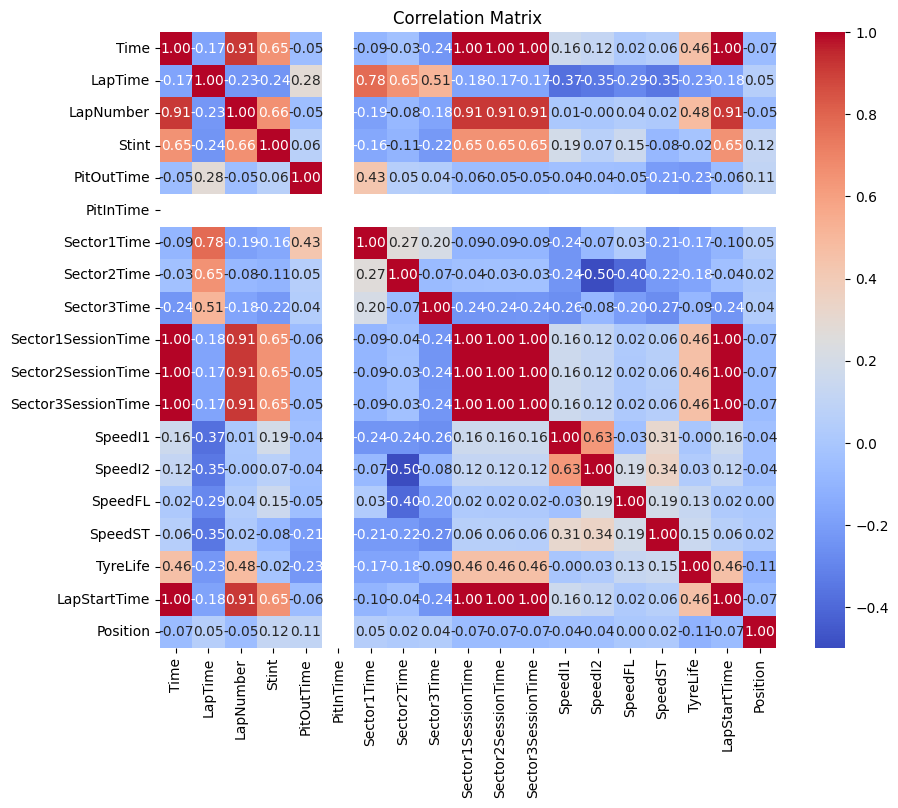

In [135]:
correlation_matrix = cleaned_laps_df.select_dtypes(include=['number']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

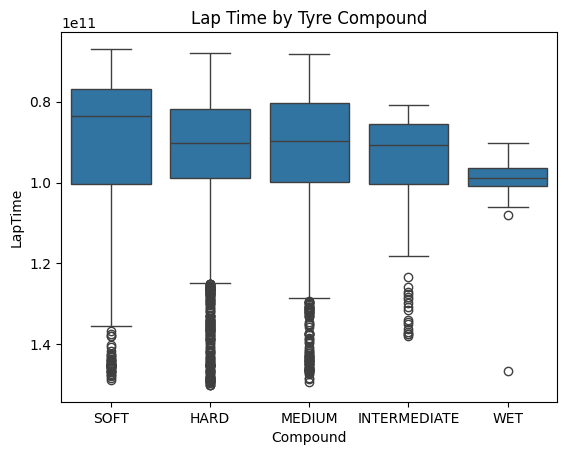

                                  mean                 median
Compound                                                     
HARD         0 days 00:01:31.140011475 0 days 00:01:30.229000
INTERMEDIATE 0 days 00:01:33.495989323 0 days 00:01:30.737500
MEDIUM       0 days 00:01:30.969581184 0 days 00:01:29.781000
SOFT         0 days 00:01:31.340624611 0 days 00:01:23.529000
WET          0 days 00:01:39.723547619 0 days 00:01:38.848000


In [136]:
sns.boxplot(x='Compound', y='LapTime', data=cleaned_laps_df)
plt.title("Lap Time by Tyre Compound")
plt.show()

# Mean/Median comparison
compound_lap_times = cleaned_laps_df.groupby('Compound')['LapTime'].agg(['mean', 'median'])
print(compound_lap_times)

In [137]:
# Mean comparison of Lap Time based on FreshTyre
fresh_tyre_lap_time = cleaned_laps_df.groupby('FreshTyre')['LapTime'].mean()
print(fresh_tyre_lap_time)

FreshTyre
False   0 days 00:01:28.090070415
True    0 days 00:01:32.132723136
Name: LapTime, dtype: timedelta64[ns]


### Correlation Values Overview
- I will be focussing on each column's correlation with LapTime
- Sector1Time has a strong positive correlation with LapTime
- Position has a moderate positive correlation with LapTime
- LapNumber and TyreLife has a weak inverse relationship with LapTime
- PitOutTime, PitInTime, SpeedI2, SpeedFL, SpeedST all have negligible correlation

### Feature Engineering
- Since Sector1Time has such a strong correlation with LapTime, I will use it directly as a feature and normalise it.
- Sector1Time, Sector2Time and Sector3Time will be combined to TotalSectorTime and AverageSectorTime.
- LapNumber will be made categorical into: first 10 laps, mid-race laps and final laps.
- TyreLife will be made categorical into: new, mid-life and worn.
- TyreLife and LapNumber will be multipied to make TyreLife_LapNumber_Interaction.
- Compound, FreshTyre will be one-hot encoded.
- LapStartHour will be extracted from LapStartDate to be used instead.
- LapTimeSeconds will be used instead of LapTime.
- Redundant columns will be dropped that are either beyond my scope or inconvenient.

In [138]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cleaned_laps_df['Sector1TimeNorm'] = scaler.fit_transform(cleaned_laps_df[['Sector1Time']])

cleaned_laps_df['TotalSectorTime'] = cleaned_laps_df['Sector1Time'] + cleaned_laps_df['Sector2Time'] + cleaned_laps_df['Sector3Time']
cleaned_laps_df['AverageSectorTime'] = cleaned_laps_df['TotalSectorTime'] / 3

def categorize_lap(lap_number):
    if lap_number <= 10:
        return 'First 10 Laps'
    elif lap_number <= 45:  # Assuming a race has around 70 laps, adjust as needed
        return 'Mid-Race Laps'
    else:
        return 'Final Laps'

cleaned_laps_df['LapNumberCategory'] = cleaned_laps_df['LapNumber'].apply(categorize_lap)

def categorize_tyre_life(tyre_life):
    if tyre_life <= 10:
        return 'New'
    elif tyre_life <= 30:
        return 'Mid-Life'
    else:
        return 'Worn'

cleaned_laps_df['TyreLifeCategory'] = cleaned_laps_df['TyreLife'].apply(categorize_tyre_life)

cleaned_laps_df['TyreLife_LapNumber_Interaction'] = cleaned_laps_df['TyreLife'] * cleaned_laps_df['LapNumber']

compound_dummies = pd.get_dummies(cleaned_laps_df['Compound'], prefix='Compound', drop_first=False)
cleaned_laps_df = pd.concat([cleaned_laps_df, compound_dummies], axis=1)
cleaned_laps_df = pd.get_dummies(cleaned_laps_df, columns=['FreshTyre'], drop_first=False)

cleaned_laps_df['LapStartHour'] = cleaned_laps_df['LapStartDate'].dt.hour

cleaned_laps_df['LapTimeSeconds'] = cleaned_laps_df['LapTime'].dt.total_seconds()

cleaned_laps_df = pd.get_dummies(cleaned_laps_df, columns=['EventName'], drop_first=False)


columns_to_drop = ['LapTime', 'Time', 'Driver', 'DriverNumber', 'Team', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'Compound', 'FreshTyre_True', 'PitOutTime', 'PitInTime', 'LapStartDate']
cleaned_laps_df.drop(columns=columns_to_drop, inplace=True)

cleaned_laps_df['LapNumberCategory'] = cleaned_laps_df['LapNumberCategory'].astype('category')
cleaned_laps_df['TyreLifeCategory'] = cleaned_laps_df['TyreLifeCategory'].astype('category')

cleaned_laps_df.head()

,LapNumber,Stint,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,...,EventName_Las Vegas Grand Prix,EventName_Mexico City Grand Prix,EventName_Miami Grand Prix,EventName_Monaco Grand Prix,EventName_Qatar Grand Prix,EventName_Saudi Arabian Grand Prix,EventName_Singapore Grand Prix,EventName_Spanish Grand Prix,EventName_São Paulo Grand Prix,EventName_United States Grand Prix
1,2.0,1.0,0 days 01:04:47.303000,0 days 01:05:29.807000,0 days 01:05:53.935000,227.0,238.0,278.0,288.0,True,...,False,False,False,False,False,False,False,False,False,False
3,4.0,1.0,0 days 01:08:03.212000,0 days 01:08:45.854000,0 days 01:09:09.917000,228.0,238.0,278.0,289.0,False,...,False,False,False,False,False,False,False,False,False,False
5,6.0,1.0,0 days 01:11:19.293000,0 days 01:12:01.925000,0 days 01:12:25.938000,229.0,239.0,279.0,291.0,False,...,False,False,False,False,False,False,False,False,False,False
6,7.0,1.0,0 days 01:12:57.228000,0 days 01:13:39.991000,0 days 01:14:03.959000,230.0,239.0,279.0,293.0,False,...,False,False,False,False,False,False,False,False,False,False
11,12.0,1.0,0 days 01:21:08.651000,0 days 01:21:51.602000,0 days 01:22:15.834000,231.0,241.0,278.0,294.0,False,...,False,False,False,False,False,False,False,False,False,False


In [139]:
cleaned_laps_df.columns

Index(['LapNumber', 'Stint', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'TyreLife', 'LapStartTime', 'TrackStatus', 'Position',
       'Sector1TimeNorm', 'TotalSectorTime', 'AverageSectorTime',
       'LapNumberCategory', 'TyreLifeCategory',
       'TyreLife_LapNumber_Interaction', 'Compound_HARD',
       'Compound_INTERMEDIATE', 'Compound_MEDIUM', 'Compound_SOFT',
       'Compound_WET', 'FreshTyre_False', 'LapStartHour', 'LapTimeSeconds',
       'EventName_Abu Dhabi Grand Prix', 'EventName_Australian Grand Prix',
       'EventName_Austrian Grand Prix', 'EventName_Azerbaijan Grand Prix',
       'EventName_Bahrain Grand Prix', 'EventName_Belgian Grand Prix',
       'EventName_British Grand Prix', 'EventName_Canadian Grand Prix',
       'EventName_Dutch Grand Prix', 'EventName_Hungarian Grand Prix',
       'EventName_Italian Grand Prix', 'EventName_Japanese Grand Prix',
       'EventName_Las

In [140]:
cleaned_laps_df.to_pickle('cleaned_laps_df.pkl')